## 2 MDPs

1. Small Gridworld
2. MDP 2


## Algorithms

- Value iteration
- Policy iteration

- Q* Learning


#### Citations

The following examples are from the source code repository of the RLPy library, cited as follows:

* Alborz Geramifard, Robert H Klein, Christoph Dann, William Dabney and Jonathan P How, RLPy: The Reinforcement Learning Library for Education and Research, 2013. http://acl.mit.edu/RLPy, April, 2013


In [2]:
import rlpy as rl

In [3]:
from rlpy.Domains import GridWorld
import numpy as np

ACTIONS = np.array([[-1, 0], [+1, 0], [0, -1], [0, +1]])

def get_V(domain, representation):
    ''' Returns value matrix and matrix of best actions (shape: n, m, 2)'''
    V = np.zeros((domain.ROWS, domain.COLS))
    A = np.zeros((domain.ROWS, domain.COLS, 2))
    for r in xrange(domain.ROWS):
        for c in xrange(domain.COLS):
            if domain.map[r, c] == domain.BLOCKED:
                V[r, c] = 0
            if domain.map[r, c] == domain.GOAL:
                V[r, c] = domain.MAX_RETURN
            if domain.map[r, c] == domain.PIT:
                V[r, c] = domain.MIN_RETURN
            if domain.map[r, c] == domain.EMPTY or domain.map[r, c] == domain.START:
                s = np.array([r, c])
                As = domain.possibleActions(s)
                
                # left, right, down, up
                terminal = domain.isTerminal(s)
                Qs = representation.Qs(s, terminal)
                bestA = representation.bestActions(s, terminal, As)
                
                next_A = ACTIONS[As[np.argmax(Qs[As])]]
                A[r, c] = next_A
                V[r, c] = max(Qs[As])

    return V, A

In [4]:
from matplotlib import pyplot, colors

import numpy as np

def plot_grid(qs, A):
    # make a color map of fixed colors
    qs = np.flipud(qs)
    A = np.flipud(A)

    cmap = colors.LinearSegmentedColormap.from_list(
        'my_colormap', ['red','white', 'green',])
    
    # A: n, m, 2
    U = np.zeros(qs.shape)
    V = np.zeros(qs.shape)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            U[i, j] = A[i, j, 0]
            V[i, j] = A[i, j, 1]
            

    fig = pyplot.quiver(V, U*-1, units='width')
    img = plt.imshow(qs, interpolation='nearest',
                    cmap = cmap,
                    origin ='lower')

    plt.show()
    plt.clf()


# MDP 1 - Small Gridworld

### Value Iteration

>>>  ./Results/gridworld/small/ValueIteration/001-results.json


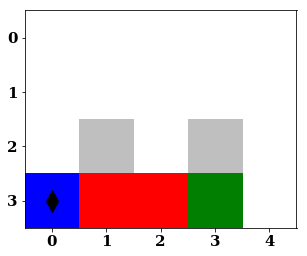

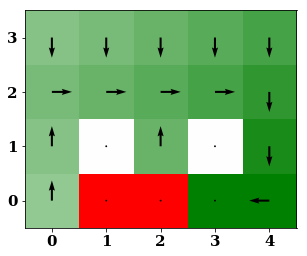

In [5]:
__author__ = "Joseph Munoz"

from rlpy.Tools import __rlpy_location__
from rlpy.Domains import GridWorld
from rlpy.MDPSolvers import ValueIteration
from rlpy.Representations import Tabular
from rlpy.Policies import GibbsPolicy
from rlpy.Experiments import MDPSolverExperiment

import rlpy

import matplotlib.pyplot as plt
%matplotlib inline

import os

def make_experiment(exp_id=1, path="./Results/Temp", show=False):
    """
    Each file specifying an experimental setup should contain a
    make_experiment function which returns an instance of the Experiment
    class with everything set up.
    @param id: number used to seed the random number generators
    @param path: output directory where logs and results are stored
    """

    # Domain:
    # MAZE                = '/Domains/GridWorldMaps/1x3.txt'
    default_map_dir = os.path.join(
        __rlpy_location__,
        "DomainProblems",
        "GridWorldMaps")
    maze = os.path.join(default_map_dir, '4x5.txt')
    domain = GridWorld(maze, noise=0.0)
    
    # Representation
    representation = Tabular(domain, discretization=20)
    
    # Agent
    MDPsolver = ValueIteration(
        exp_id,
        representation,
        domain,
        project_path=path,
        show=show)

    MDPsolver.solve()
    
    #Plot
    domain.showDomain()
    plt.clf()
    V, A = get_V(domain, MDPsolver.representation)
    plot_grid(V, A)
    

path = "./Results/gridworld/small/ValueIteration/"
make_experiment(1, path=path)

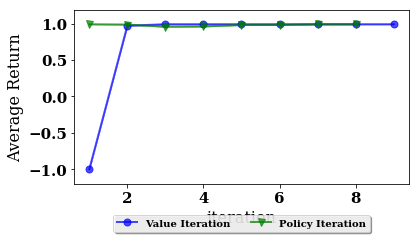

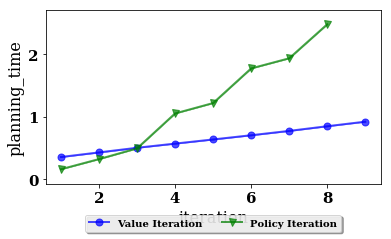

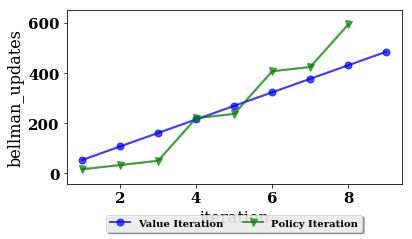

In [178]:
import rlpy.Tools.results as rt

paths = {"Value Iteration": "./Results/gridworld/small/ValueIteration/",
         "Policy Iteration": "./Results/gridworld/small/PolicyIteration/"}

merger = rt.MultiExperimentResults(paths)
fig = merger.plot_avg_sem("iteration", "return")

fig = merger.plot_avg_sem("iteration", "planning_time")
fig = merger.plot_avg_sem("iteration", "bellman_updates")


### Policy Iteration

>>>  ./Results/gridworld/small/PolicyIteration/001-results.json


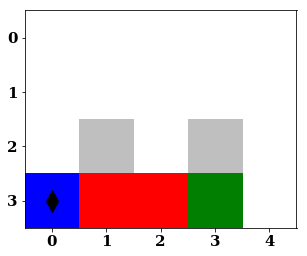

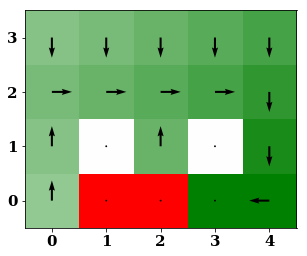

In [161]:
__author__ = "Joseph Munoz"

from rlpy.Tools import __rlpy_location__
from rlpy.Domains import GridWorld
from rlpy.MDPSolvers import PolicyIteration
from rlpy.Representations import Tabular
from rlpy.Policies import GibbsPolicy
from rlpy.Experiments import MDPSolverExperiment

import rlpy

import matplotlib.pyplot as plt
%matplotlib inline

import os

def make_experiment(exp_id=1, path="./Results/Temp", show=False):
    """
    Each file specifying an experimental setup should contain a
    make_experiment function which returns an instance of the Experiment
    class with everything set up.
    @param id: number used to seed the random number generators
    @param path: output directory where logs and results are stored
    """

    # Domain:
    # MAZE                = '/Domains/GridWorldMaps/1x3.txt'
    default_map_dir = os.path.join(
        __rlpy_location__,
        "DomainProblems",
        "GridWorldMaps")
    maze = os.path.join(default_map_dir, '4x5.txt')
    domain = GridWorld(maze, noise=0.0)
    
    # Representation
    representation = Tabular(domain, discretization=20)

    # Agent
    MDPsolver = PolicyIteration(
        exp_id,
        representation,
        domain,
        project_path=path,
        show=show)

    MDPsolver.solve()
    
    #Plot
    domain.showDomain()
    plt.clf()
    V, A = get_V(domain, MDPsolver.representation)
    plot_grid(V, A)


path = "./Results/gridworld/small/PolicyIteration/"
make_experiment(1, path=path)

# MDP 2 - Large, Two-Room Gridworld

### Value Iteration

>>>  ./Results/gridworld/twoRooms/ValueIteration/001-results.json


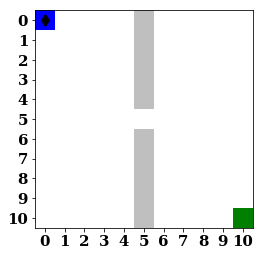

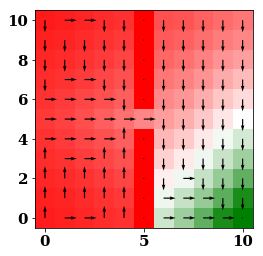

In [162]:
__author__ = "Joseph Munoz"

from rlpy.Tools import __rlpy_location__
from rlpy.Domains import GridWorld
from rlpy.MDPSolvers import ValueIteration
from rlpy.Representations import Tabular
from rlpy.Policies import GibbsPolicy
from rlpy.Experiments import MDPSolverExperiment

import rlpy

import matplotlib.pyplot as plt
%matplotlib inline

import os

def make_experiment(exp_id=1, path="./Results/Temp", show=False):
    """
    Each file specifying an experimental setup should contain a
    make_experiment function which returns an instance of the Experiment
    class with everything set up.
    @param id: number used to seed the random number generators
    @param path: output directory where logs and results are stored
    """

    default_map_dir = os.path.join(
        __rlpy_location__,
        "DomainProblems",
        "GridWorldMaps")
    maze = os.path.join(default_map_dir, '11x11-TwoRooms.txt')
    domain = GridWorld(maze, noise=0.3)
    
    # Representation
    representation = Tabular(domain, discretization=20)

    # Agent
    MDPsolver = ValueIteration(
        exp_id,
        representation,
        domain,
        project_path=path,
        show=show)

    MDPsolver.solve()
    
    #Plot
    domain.showDomain()
    plt.clf()
    V, A = get_V(domain, MDPsolver.representation)
    plot_grid(V, A)

path = "./Results/gridworld/twoRooms/ValueIteration/"
make_experiment(1, path=path)

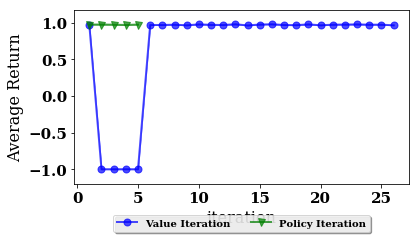

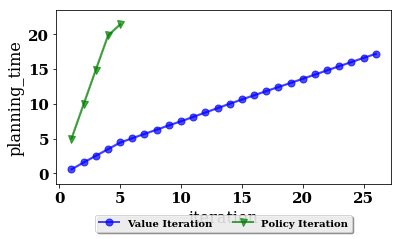

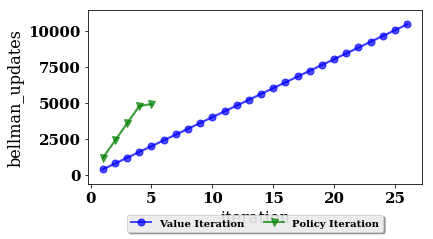

In [180]:
import rlpy.Tools.results as rt

paths = {"Value Iteration": "./Results/gridworld/twoRooms/ValueIteration/",
         "Policy Iteration": "./Results/gridworld/twoRooms/PolicyIteration/"}

merger = rt.MultiExperimentResults(paths)
fig = merger.plot_avg_sem("iteration", "return")
fig = merger.plot_avg_sem("iteration", "planning_time")
fig = merger.plot_avg_sem("iteration", "bellman_updates")


### Policy Iteration

>>>  ./Results/gridworld/twoRooms/PolicyIteration/001-results.json


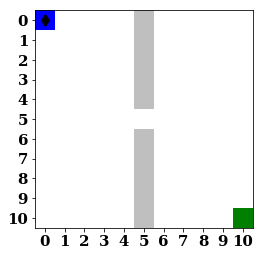

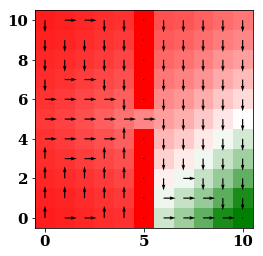

In [163]:
__author__ = "Joseph Munoz"

from rlpy.Tools import __rlpy_location__
from rlpy.Domains import GridWorld
from rlpy.MDPSolvers import PolicyIteration
from rlpy.Representations import Tabular
from rlpy.Policies import GibbsPolicy
from rlpy.Experiments import MDPSolverExperiment

import rlpy

import matplotlib.pyplot as plt
%matplotlib inline

import os

def make_experiment(exp_id=1, path="./Results/Temp", show=False):
    """
    Each file specifying an experimental setup should contain a
    make_experiment function which returns an instance of the Experiment
    class with everything set up.
    @param id: number used to seed the random number generators
    @param path: output directory where logs and results are stored
    """

    default_map_dir = os.path.join(
        __rlpy_location__,
        "DomainProblems",
        "GridWorldMaps")
    maze = os.path.join(default_map_dir, '11x11-TwoRooms.txt')
    domain = GridWorld(maze, noise=0.3)
    
    # Representation
    representation = Tabular(domain, discretization=20)

    # Agent
    MDPsolver = PolicyIteration(
        exp_id,
        representation,
        domain,
        project_path=path,
        show=show)

    MDPsolver.solve()
    
    #Plot
    domain.showDomain()
    plt.clf()
    V, A = get_V(domain, MDPsolver.representation)
    plot_grid(V, A)

path = "./Results/gridworld/twoRooms/PolicyIteration/"
make_experiment(1, path=path)

# Q - Learning

# MDP 1. - Small Gridworld

Output:			./Results/gridworld/small/qLearning/
INFO:rlpy.Experiments.Experiment:Output:			./Results/gridworld/small/qLearning/
     0: >>> E[0:00:00]-R[?]: Return=   -0.8693, Steps=10.34, Features = 20
INFO:rlpy.Experiments.Experiment:     0: >>> E[0:00:00]-R[?]: Return=   -0.8693, Steps=10.34, Features = 20
   200: >>> E[0:00:00]-R[0:00:01]: Return=        -1, Steps=1000.0, Features = 20
INFO:rlpy.Experiments.Experiment:   200: >>> E[0:00:00]-R[0:00:01]: Return=        -1, Steps=1000.0, Features = 20
   400: >>> E[0:00:00]-R[0:00:01]: Return=        -1, Steps=1000.0, Features = 20
INFO:rlpy.Experiments.Experiment:   400: >>> E[0:00:00]-R[0:00:01]: Return=        -1, Steps=1000.0, Features = 20
   600: >>> E[0:00:00]-R[0:00:01]: Return=        -1, Steps=1000.0, Features = 20
INFO:rlpy.Experiments.Experiment:   600: >>> E[0:00:00]-R[0:00:01]: Return=        -1, Steps=1000.0, Features = 20
   800: >>> E[0:00:01]-R[0:00:01]: Return=     0.992, Steps= 9.0, Features = 20
INFO:rlpy.Experimen

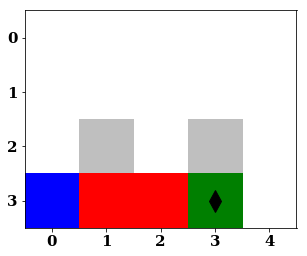

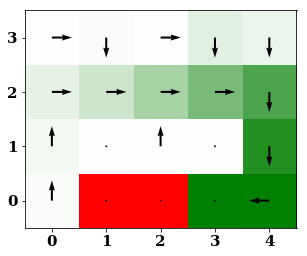

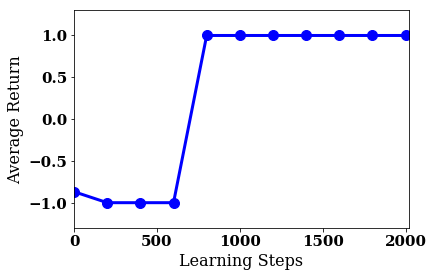

In [167]:
__author__ = "Joseph Munoz"
from rlpy.Domains import GridWorld
from rlpy.Agents import Q_Learning
from rlpy.Representations import Tabular
from rlpy.Policies import eGreedy
from rlpy.Experiments import Experiment
import os


def make_experiment(exp_id=1, path="./Results/gridworld/small/qLearning"):
    """
    Each file specifying an experimental setup should contain a
    make_experiment function which returns an instance of the Experiment
    class with everything set up.

    @param id: number used to seed the random number generators
    @param path: output directory where logs and results are stored
    """
    opt = {}
    opt["exp_id"] = exp_id
    opt["path"] = path

    # Domain:
    default_map_dir = os.path.join(
        __rlpy_location__,
        "DomainProblems",
        "GridWorldMaps")
#     maze = os.path.join(GridWorld.default_map_dir, '4x5.txt')
    maze = os.path.join(default_map_dir, '4x5.txt')
    domain = GridWorld(maze, noise=0.0)
    opt["domain"] = domain

    # Representation
    representation = Tabular(domain, discretization=20)

    # Policy
    policy = eGreedy(representation, epsilon=0.2)

    # Agent
    agent = Q_Learning(representation=representation, policy=policy,
                       discount_factor=domain.discount_factor,
                       initial_learn_rate=0.1,
                       learn_rate_decay_mode="boyan", boyan_N0=100,
                       lambda_=0.)
    opt["agent"] = agent
    opt["checks_per_policy"] = 100
    opt["max_steps"] = 2000
    opt["num_policy_checks"] = 10
    experiment = Experiment(**opt)
    return experiment, domain, agent

if __name__ == '__main__':
    experiment, domain, agent = make_experiment(1)
    
    experiment.run(visualize_steps=False,  # should each learning step be shown?
                   visualize_learning=False,  # show policy / value function?
                   visualize_performance=0)  # show performance runs?
    
    #Plot
    domain.showDomain()
    plt.clf()
    V, A = get_V(domain, agent.representation)
    plot_grid(V, A)
    
    experiment.plot()
    experiment.save()


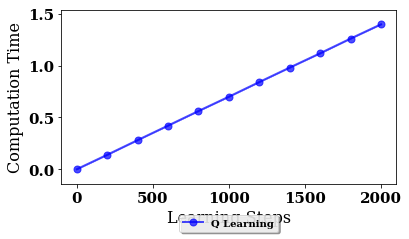

In [181]:
import rlpy.Tools.results as rt

paths = {"Q Learning": "./Results/gridworld/small/qLearning/"}

merger = rt.MultiExperimentResults(paths)
fig = merger.plot_avg_sem("learning_steps", "learning_time")

# MDP 2. - Large, Two-Room, Stochastic Gridworld

The epsilon and learning rate require fiddling with for proper analysis and good results.

Output:			./Results/gridworld/twoRooms/qLearning/
INFO:rlpy.Experiments.Experiment:Output:			./Results/gridworld/twoRooms/qLearning/
     0: >>> E[0:00:00]-R[?]: Return=    -0.281, Steps=761.5, Features = 121
INFO:rlpy.Experiments.Experiment:     0: >>> E[0:00:00]-R[?]: Return=    -0.281, Steps=761.5, Features = 121
   400: >>> E[0:00:00]-R[0:00:03]: Return=   -0.5577, Steps=867.98, Features = 121
INFO:rlpy.Experiments.Experiment:   400: >>> E[0:00:00]-R[0:00:03]: Return=   -0.5577, Steps=867.98, Features = 121
   800: >>> E[0:00:01]-R[0:00:03]: Return=        -1, Steps=1000.0, Features = 121
INFO:rlpy.Experiments.Experiment:   800: >>> E[0:00:01]-R[0:00:03]: Return=        -1, Steps=1000.0, Features = 121
  1200: >>> E[0:00:01]-R[0:00:02]: Return=        -1, Steps=1000.0, Features = 121
INFO:rlpy.Experiments.Experiment:  1200: >>> E[0:00:01]-R[0:00:02]: Return=        -1, Steps=1000.0, Features = 121
  1600: >>> E[0:00:01]-R[0:00:02]: Return=        -1, Steps=1000.0, Features = 121
IN

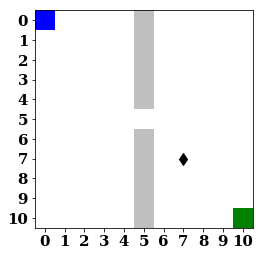

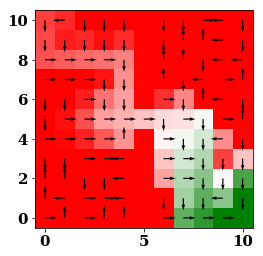

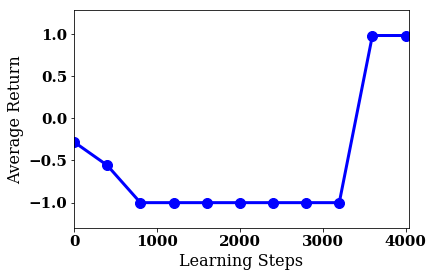

In [192]:
__author__ = "Joseph Munoz"
from rlpy.Domains import GridWorld
from rlpy.Agents import Q_Learning
from rlpy.Representations import Tabular
from rlpy.Policies import eGreedy
from rlpy.Experiments import Experiment
import os


def make_experiment(exp_id=1, path="./Results/gridworld/twoRooms/qLearning"):
    """
    Each file specifying an experimental setup should contain a
    make_experiment function which returns an instance of the Experiment
    class with everything set up.

    @param id: number used to seed the random number generators
    @param path: output directory where logs and results are stored
    """
    opt = {}
    opt["exp_id"] = exp_id
    opt["path"] = path

    # Domain:
    default_map_dir = os.path.join(
        __rlpy_location__,
        "DomainProblems",
        "GridWorldMaps")
#     maze = os.path.join(GridWorld.default_map_dir, '4x5.txt')
    maze = os.path.join(default_map_dir, '11x11-TwoRooms.txt')
    domain = GridWorld(maze, noise=0.0)
    opt["domain"] = domain

    # Representation
    representation = Tabular(domain, discretization=20)

    # Policy
    policy = eGreedy(representation, epsilon=0.1)

    # Agent
    agent = Q_Learning(representation=representation, policy=policy,
                       discount_factor=domain.discount_factor,
                       initial_learn_rate=1.,
                       learn_rate_decay_mode="boyan", boyan_N0=100,
                       lambda_=0.)
    opt["agent"] = agent
    opt["checks_per_policy"] = 100
    opt["max_steps"] = 4000
    opt["num_policy_checks"] = 10
    experiment = Experiment(**opt)
    return experiment, domain, agent

if __name__ == '__main__':
    experiment, domain, agent = make_experiment(1)
    
    experiment.run(visualize_steps=False,  # should each learning step be shown?
                   visualize_learning=False,  # show policy / value function?
                   visualize_performance=0)  # show performance runs?
    
    #Plot
    domain.showDomain()
    plt.clf()
    V, A = get_V(domain, agent.representation)
    plot_grid(V, A)
    
    experiment.plot()
    experiment.save()


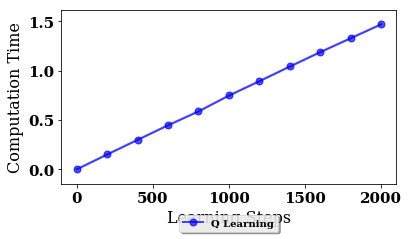

In [182]:
import rlpy.Tools.results as rt

paths = {"Q Learning": "./Results/gridworld/twoRooms/qLearning/"}

merger = rt.MultiExperimentResults(paths)
fig = merger.plot_avg_sem("learning_steps", "learning_time")